<a href="https://colab.research.google.com/github/danaa23/studentdropout/blob/main/Dropout_analysis_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring the Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install Flask


In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/New Persistence_EditedbyLovey(Cleaned Data-LOVEY).csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify data is loaded correctly

# # # Rename the column
df.rename(columns={'1E+13': 'last_mm_tot_credits'}, inplace=True)
print(df.head())

   SDBSrcSystemKey  AcademicCareerEntryQtrKeyId  transfer_student  \
0          1099262                        20081                 1   
1          1099263                        20144                 1   
2          1099264                        20074                 1   
3          1099266                        20084                 1   
4          1099273                        20074                 1   

        Entry_group EntryResidentCategory  PELL_Eligible_at_Entry  \
0  Transfer Student              Resident                       1   
1  Transfer Student              Resident                       1   
2  Transfer Student              Resident                       1   
3  Transfer Student              Resident                       0   
4  Transfer Student              Resident                       1   

  EntryIPEDSRaceEthnicityCategory EntryGenderCode  EntryFullTimeStudentFlag  \
0       Black or African American               F                         0   
1           

In [4]:
dropout_analysis = df['Dropout'].value_counts()
dropout_percentage = df['Dropout'].value_counts(normalize=True) * 100

# Print the results
print("Dropout Analysis:")
print(dropout_analysis)
print("\nDropout Percentage:")
print(dropout_percentage)

Dropout Analysis:
Dropout
0    52868
1    11250
Name: count, dtype: int64

Dropout Percentage:
Dropout
0    82.454225
1    17.545775
Name: proportion, dtype: float64


In [5]:
df.shape

(64118, 46)

In [6]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

first_generation           18518
RetainedNoYesYearLater      4626
RetainedNo2YearLater       27936
second_year_college        14084
major_abbr                    20
major_pathway                 20
FinCollegeReportingName       94
dtype: int64


In [7]:
na_counts = df.isna().sum()
print(na_counts[na_counts > 0])

first_generation           18518
RetainedNoYesYearLater      4626
RetainedNo2YearLater       27936
second_year_college        14084
major_abbr                    20
major_pathway                 20
FinCollegeReportingName       94
dtype: int64


In [8]:
# Fill missing values with the most frequent value (mode)
columns_with_na = ['first_generation',  'RetainedNoYesYearLater','RetainedNo2YearLater',
                   'second_year_college', 'major_abbr', 'major_pathway', 'FinCollegeReportingName']

for column in columns_with_na:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [9]:
categorical_columns = [
    'Entry_group', 'EntryResidentCategory', 'EntryIPEDSRaceEthnicityCategory',
    'EntryGenderCode', 'first_generation', 'entry_college', 'entry_major',
    'second_year_college', 'second_year_major', 'major_abbr',
    'FinCollegeReportingName', 'new_vet_desc'
]

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify that there are no more missing values in the specified columns
null_counts_after = df[categorical_columns].isnull().sum()
print(null_counts_after[null_counts_after > 0])

Series([], dtype: int64)


# **Cleaning Properly**

In [10]:
# Define the columns of interest
columns_of_interest = [
    'EntryGenderCode',
    'EntryFullTimeStudentFlag',
    'EntryIPEDSRaceEthnicityCategory','second_year_college', 'major_abbr', 'major_pathway', 'FinCollegeReportingName'
]

# Extract unique values for each column
for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}\n")

Unique values in EntryGenderCode: ['F' 'M' 'U']

Unique values in EntryFullTimeStudentFlag: [0 1]

Unique values in EntryIPEDSRaceEthnicityCategory: ['Black or African American' 'White' 'Asian'
 'Native Hawaiian or Other Pacific Islander' 'Not Indicated'
 'Hispanic or Latino' 'Two or More Races'
 'International (Nonresident Alien)' 'American Indian or Alaska Native']

Unique values in second_year_college: ['Interdisciplinary Arts and Sciences'
 'School of Engineering and Technology' 'Milgard School of Business'
 'Social Work and Criminal Justice' 'Urban Studies'
 'Nursing and Healthcare Leadership' 'Undergraduate Academic Affairs'
 'Business' 'College of Arts and Sciences' 'School of Medicine'
 'College of the Environment'
 'Science Technology Engineering and Mathematics'
 'Nursing and Health Studies' 'Education' 'College of Engineering'
 'School of Public Health' 'School of Pharmacy' 'The Information School'
 'College of Education' 'Educational Studies' 'School of Nursing'
 'School of

In [11]:
# Extract unique values for each column
unique_values_dict = {}

for column in df.columns:
    unique_values = df[column].unique()
    unique_values_dict[column] = unique_values
    print(f"Unique values in {column}: {unique_values}\n")

Unique values in SDBSrcSystemKey: [1099262 1099263 1099264 ... 2646059 2646060 2646061]

Unique values in AcademicCareerEntryQtrKeyId: [20081 20144 20074 20084 20141 20073 20103 20082 20092 20134 20094 20091
 20102 20083 20101 20104 20184 20154 20111 20121 20124 20113 20114 20163
 20112 20174 20161 20172 20151 20194 20204 20234 20164 20133 20132 20153
 20142 20152 20202 20162 20171 20054 20064 20201 20224 20191 20192 20181
 20182 20211 20214 20072 20143 20122 20232 20223 20222 20231 20233 20131
 20213 20212 20221 20123 20093 20193 20203 20061 20063 20173 20071 20062
 20183]

Unique values in transfer_student: [1 0]

Unique values in Entry_group: ['Transfer Student' 'First-Time, First-Year Student'
 'Previous or Other Student']

Unique values in EntryResidentCategory: ['Resident' 'Domestic Non-Resident' 'International']

Unique values in PELL_Eligible_at_Entry: [1 0]

Unique values in EntryIPEDSRaceEthnicityCategory: ['Black or African American' 'White' 'Asian'
 'Native Hawaiian or Othe

In [12]:
# Define the mapping for the dummy columns
race_mapping = {
    'Black or African American': 'Race_African_American',
    'White': 'Race_White',
    'Asian': 'Race_Asian'
}

# Create dummy variables for the specified race categories
for original_race, new_column in race_mapping.items():
    df[new_column] = (df['EntryIPEDSRaceEthnicityCategory'] == original_race).astype(int)

# Display the first few rows to verify the dummy variables
print(df.head())

   SDBSrcSystemKey  AcademicCareerEntryQtrKeyId  transfer_student  \
0          1099262                        20081                 1   
1          1099263                        20144                 1   
2          1099264                        20074                 1   
3          1099266                        20084                 1   
4          1099273                        20074                 1   

        Entry_group EntryResidentCategory  PELL_Eligible_at_Entry  \
0  Transfer Student              Resident                       1   
1  Transfer Student              Resident                       1   
2  Transfer Student              Resident                       1   
3  Transfer Student              Resident                       0   
4  Transfer Student              Resident                       1   

  EntryIPEDSRaceEthnicityCategory EntryGenderCode  EntryFullTimeStudentFlag  \
0       Black or African American               F                         0   
1           

In [13]:
# Analyze dropout rates for each category
dropout_analysis = {}

for category in categorical_columns:
    grouped = df.groupby(category)['Dropout'].mean() * 100  # Calculate dropout rate as a percentage
    dropout_analysis[category] = grouped

# Convert the dropout analysis results to a DataFrame for easy viewing
dropout_analysis_df = pd.concat(dropout_analysis, axis=1)


# **Data Visualization**

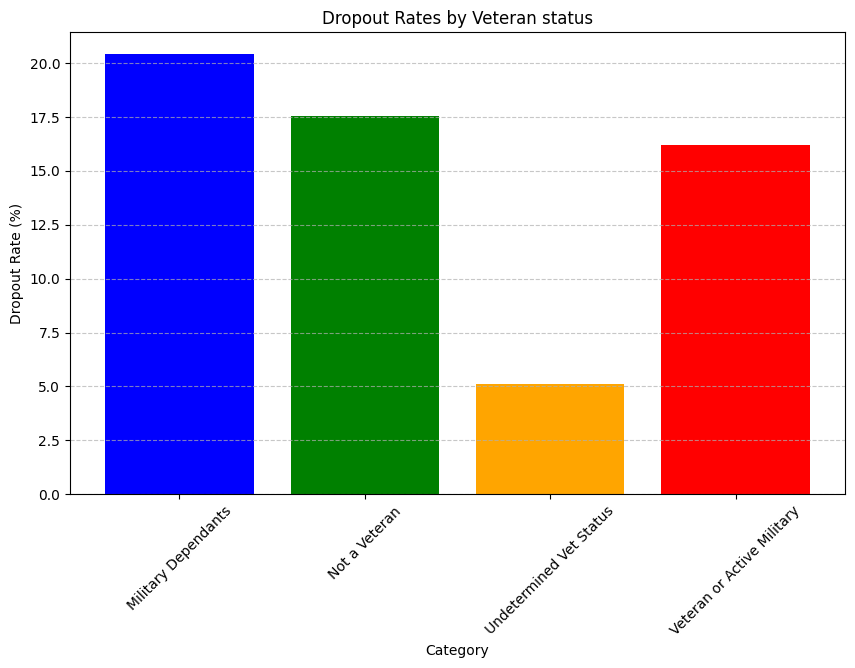

In [14]:
import matplotlib.pyplot as plt

# Data for the categories and dropout rates
categories = ["Military Dependants", "Not a Veteran", "Undetermined Vet Status", "Veteran or Active Military"]
dropout_rates = [20.409015, 17.547600, 5.128205, 16.221302]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, dropout_rates, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Category')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Veteran status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


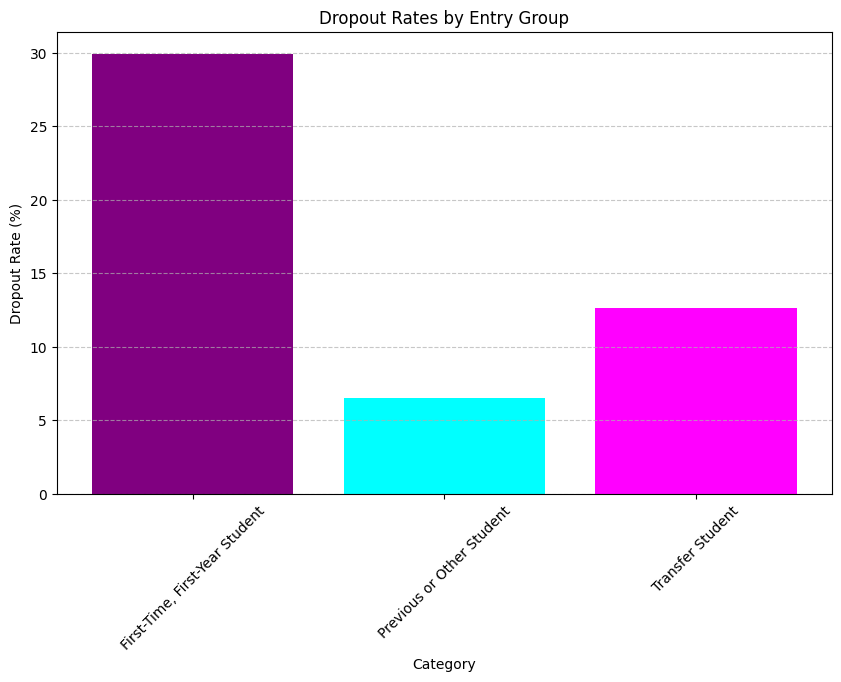

In [15]:
# Data for the new categories and dropout rates
new_categories = ["First-Time, First-Year Student", "Previous or Other Student", "Transfer Student"]
new_dropout_rates = [29.932945, 6.521739, 12.650550]

# Create a bar chart for the new categories
plt.figure(figsize=(10, 6))
plt.bar(new_categories, new_dropout_rates, color=['purple', 'cyan', 'magenta'])
plt.xlabel('Category')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Entry Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


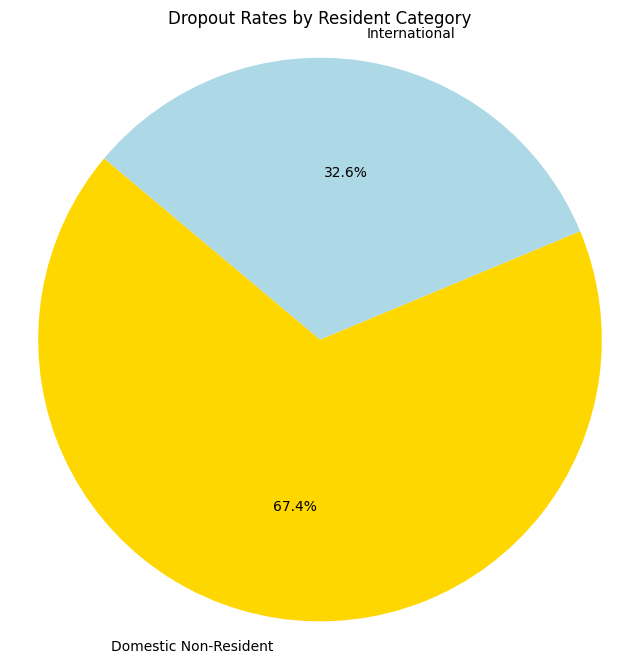

In [16]:
# Data for the resident categories and dropout rates
resident_categories = ["Domestic Non-Resident", "International"]
resident_dropout_rates = [19.502075, 9.435798]

# Create a pie chart for the resident categories
plt.figure(figsize=(8, 8))
plt.pie(resident_dropout_rates, labels=resident_categories, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue'])
plt.title('Dropout Rates by Resident Category')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


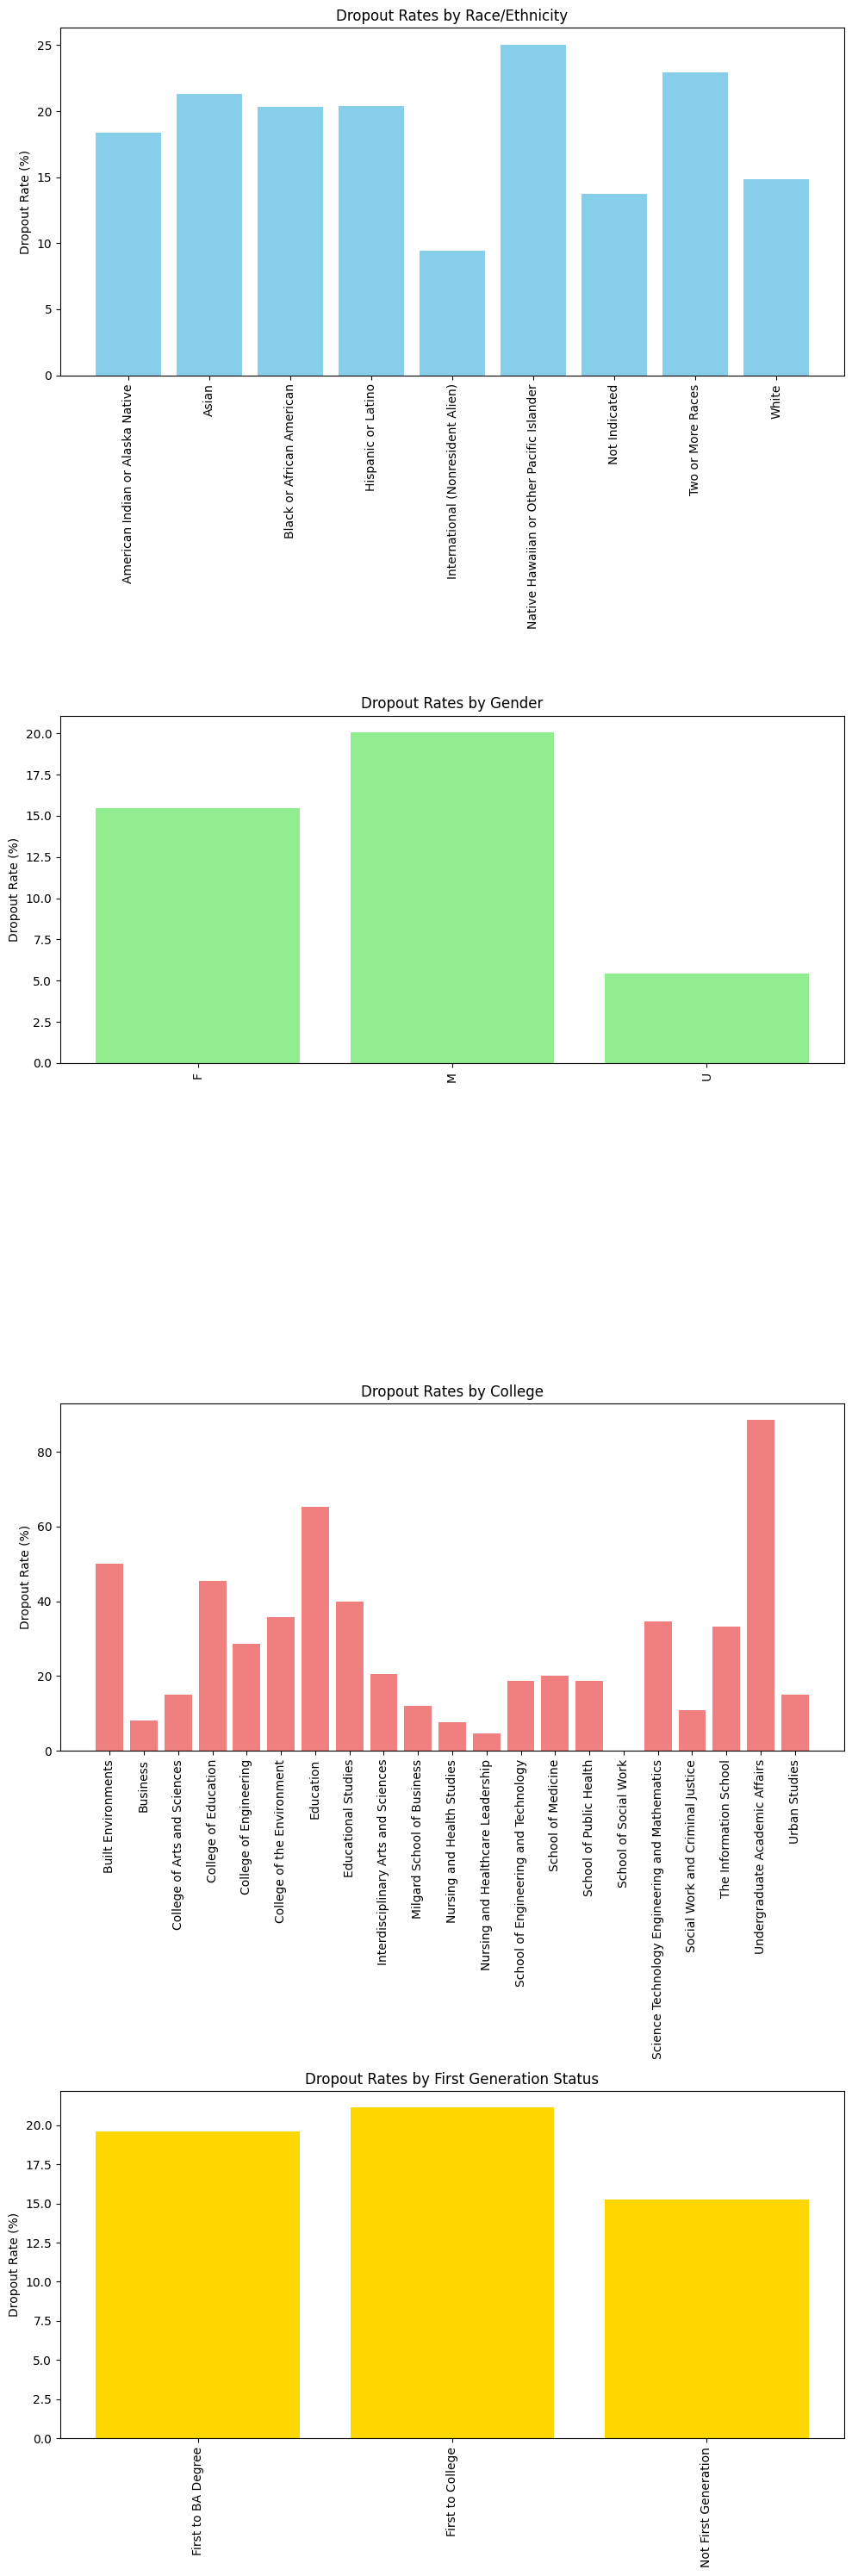

In [17]:
# Dropout percentage by 'EntryIPEDSRaceEthnicityCategory'
race_ethnicity_dropout_df = df.groupby('EntryIPEDSRaceEthnicityCategory').agg({'Dropout': 'mean'}).reset_index()
race_ethnicity_dropout_df['Dropout Rate (%)'] = race_ethnicity_dropout_df['Dropout'] * 100
race_ethnicity_dropout_df.drop('Dropout', axis=1, inplace=True)

# Dropout percentage by 'EntryGenderCode'
gender_dropout_df = df.groupby('EntryGenderCode').agg({'Dropout': 'mean'}).reset_index()
gender_dropout_df['Dropout Rate (%)'] = gender_dropout_df['Dropout'] * 100
gender_dropout_df.drop('Dropout', axis=1, inplace=True)

# Dropout percentage by 'entry_college'
college_dropout_df = df.groupby('FinCollegeReportingName').agg({'Dropout': 'mean'}).reset_index()
college_dropout_df['Dropout Rate (%)'] = college_dropout_df['Dropout'] * 100
college_dropout_df.drop('Dropout', axis=1, inplace=True)

# Dropout percentage by 'first_generation'
first_gen_dropout_df = df.groupby('first_generation').agg({'Dropout': 'mean'}).reset_index()
first_gen_dropout_df['Dropout Rate (%)'] = first_gen_dropout_df['Dropout'] * 100
first_gen_dropout_df.drop('Dropout', axis=1, inplace=True)

# Plotting the results again with the correct context for 'axs'
fig, axs = plt.subplots(4, 1, figsize=(10, 30))

# Race/Ethnicity Dropout Rates
axs[0].bar(race_ethnicity_dropout_df['EntryIPEDSRaceEthnicityCategory'], race_ethnicity_dropout_df['Dropout Rate (%)'], color='skyblue')
axs[0].set_title('Dropout Rates by Race/Ethnicity')
axs[0].set_ylabel('Dropout Rate (%)')
axs[0].tick_params(axis='x', rotation=90)

# Gender Dropout Rates
axs[1].bar(gender_dropout_df['EntryGenderCode'], gender_dropout_df['Dropout Rate (%)'], color='lightgreen')
axs[1].set_title('Dropout Rates by Gender')
axs[1].set_ylabel('Dropout Rate (%)')
axs[1].tick_params(axis='x', rotation=90)

# College Dropout Rates
axs[2].bar(college_dropout_df['FinCollegeReportingName'], college_dropout_df['Dropout Rate (%)'], color='lightcoral')
axs[2].set_title('Dropout Rates by College')
axs[2].set_ylabel('Dropout Rate (%)')
axs[2].tick_params(axis='x', rotation=90)

# First Generation Dropout Rates
axs[3].bar(first_gen_dropout_df['first_generation'], first_gen_dropout_df['Dropout Rate (%)'], color='gold')
axs[3].set_title('Dropout Rates by First Generation Status')
axs[3].set_ylabel('Dropout Rate (%)')
axs[3].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


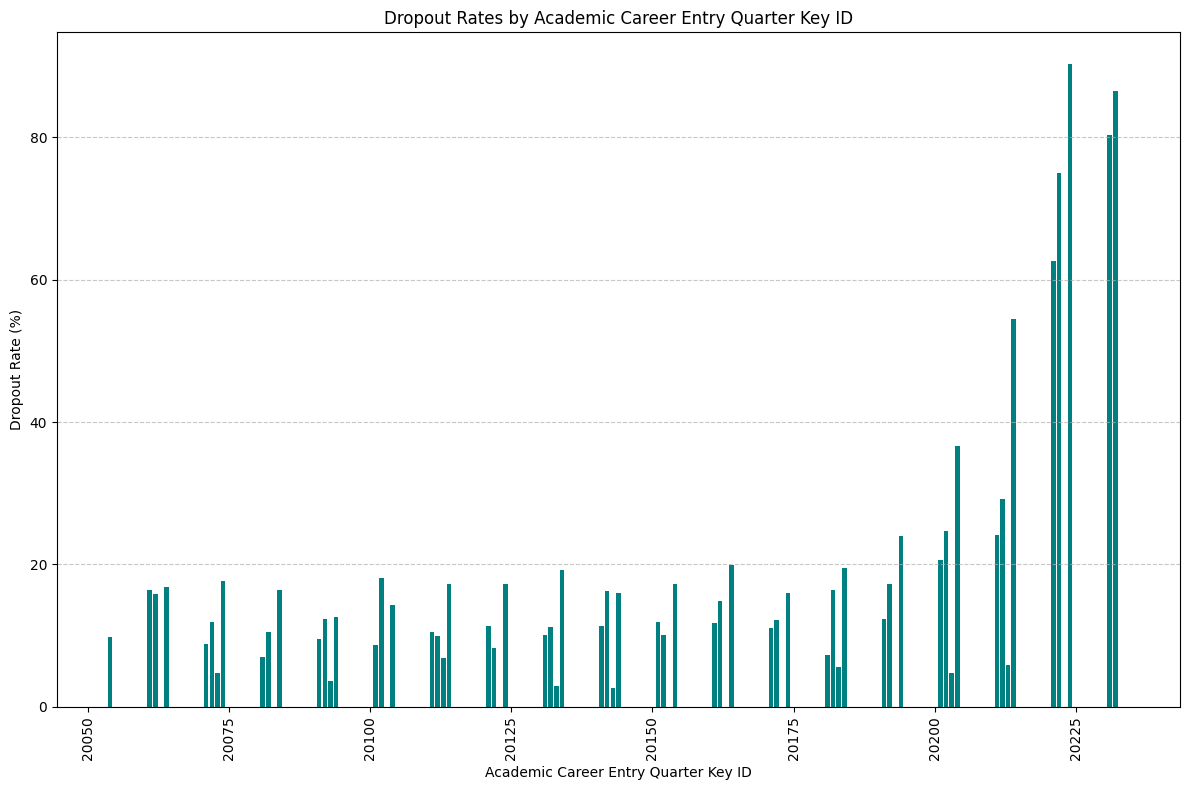

In [ ]:
# Calculate dropout rates by 'AcademicCareerEntryQtrKeyId'
academic_career_entry_qtr_dropout_df = df.groupby('AcademicCareerEntryQtrKeyId').agg({'Dropout': 'mean'}).reset_index()
academic_career_entry_qtr_dropout_df['Dropout Rate (%)'] = academic_career_entry_qtr_dropout_df['Dropout'] * 100
academic_career_entry_qtr_dropout_df.drop('Dropout', axis=1, inplace=True)

# Plotting the dropout rates by 'AcademicCareerEntryQtrKeyId'
plt.figure(figsize=(12, 8))
plt.bar(academic_career_entry_qtr_dropout_df['AcademicCareerEntryQtrKeyId'], academic_career_entry_qtr_dropout_df['Dropout Rate (%)'], color='teal')
plt.xlabel('Academic Career Entry Quarter Key ID')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Academic Career Entry Quarter Key ID')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Create a table for dropout rates by 'AcademicCareerEntryQtrKeyId'
academic_career_entry_qtr_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False, inplace=True)
academic_career_entry_qtr_dropout_df.reset_index(drop=True, inplace=True)

# Display the table
academic_career_entry_qtr_dropout_df


,AcademicCareerEntryQtrKeyId,Dropout Rate (%)
0,20224,90.241935
1,20232,86.516854
2,20231,80.295567
3,20222,75.000000
4,20221,62.672811
...,...,...
68,20123,0.000000
69,20193,0.000000
70,20153,0.000000
71,20163,0.000000


In [ ]:
# Identify the academic year quarter with the highest dropout rate
max_dropout_row = academic_career_entry_qtr_dropout_df.loc[academic_career_entry_qtr_dropout_df['Dropout Rate (%)'].idxmax()]

max_dropout_row


academic_career_20224 = df[df['AcademicCareerEntryQtrKeyId'] == 20224]

# Group by the 'Dropout' column and count the number of students in each group
dropout_counts_20224 = academic_career_20224.groupby('Dropout').size().reset_index(name='Student Count')

dropout_counts_20224


,Dropout,Student Count
0,0,121
1,1,1119


In [ ]:
# Calculate dropout rates by 'entry_major'
entry_major_dropout_df = df.groupby('entry_major').agg({'Dropout': 'mean'}).reset_index()
entry_major_dropout_df['Dropout Rate (%)'] = entry_major_dropout_df['Dropout'] * 100
entry_major_dropout_df.drop('Dropout', axis=1, inplace=True)

# Calculate dropout rates by 'second_year_college'
second_year_college_dropout_df = df.groupby('second_year_college').agg({'Dropout': 'mean'}).reset_index()
second_year_college_dropout_df['Dropout Rate (%)'] = second_year_college_dropout_df['Dropout'] * 100
second_year_college_dropout_df.drop('Dropout', axis=1, inplace=True)

# Calculate dropout rates by 'second_year_major'
second_year_major_dropout_df = df.groupby('second_year_major').agg({'Dropout': 'mean'}).reset_index()
second_year_major_dropout_df['Dropout Rate (%)'] = second_year_major_dropout_df['Dropout'] * 100
second_year_major_dropout_df.drop('Dropout', axis=1, inplace=True)

# Calculate dropout rates by 'major_abbr'
major_abbr_dropout_df = df.groupby('major_abbr').agg({'Dropout': 'mean'}).reset_index()
major_abbr_dropout_df['Dropout Rate (%)'] = major_abbr_dropout_df['Dropout'] * 100
major_abbr_dropout_df.drop('Dropout', axis=1, inplace=True)

# Display the tables
entry_major_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False, inplace=True)
second_year_college_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False, inplace=True)
second_year_major_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False, inplace=True)
major_abbr_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False, inplace=True)

entry_major_dropout_df, second_year_college_dropout_df, second_year_major_dropout_df, major_abbr_dropout_df


(    entry_major  Dropout Rate (%)
 11  2 T HIST 70        100.000000
 2    2 T CIVE 0         60.000000
 36   2 TECON 10         55.555556
 39    2 TEGL 10         50.000000
 8   2 T HIST 30         50.000000
 ..          ...               ...
 71   2 TPRENG 0          0.000000
 48    2 TEST 20          0.000000
 16   2 T SPAN 0          0.000000
 67    2 TPRCJ 0          0.000000
 58    2 TPBST 0          0.000000
 
 [85 rows x 2 columns],
                                second_year_college  Dropout Rate (%)
 0                               Built Environments        100.000000
 3                             College of Education         75.000000
 7                              Educational Studies         50.000000
 6                                        Education         45.454545
 4                           College of Engineering         42.857143
 16                         School of Public Health         40.000000
 15                              School of Pharmacy         33.3

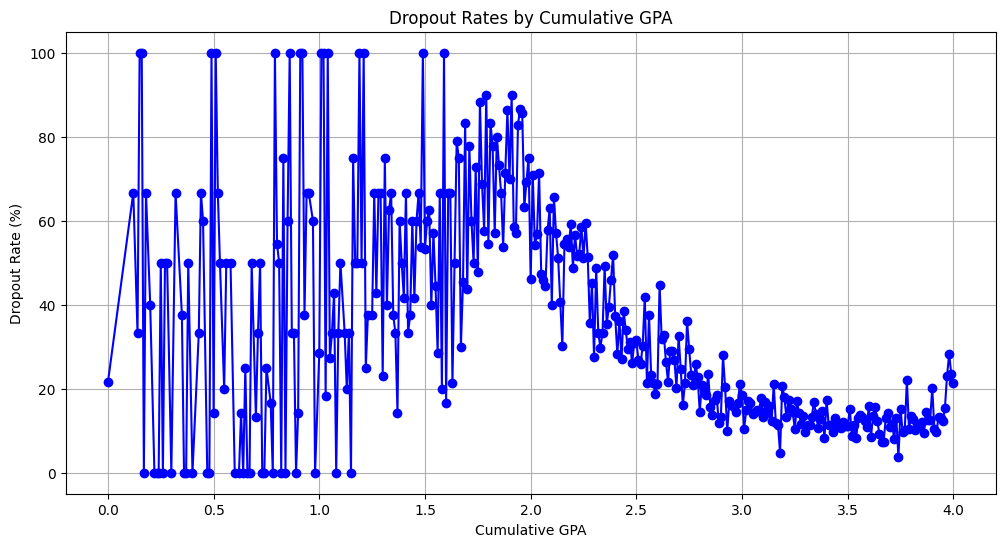

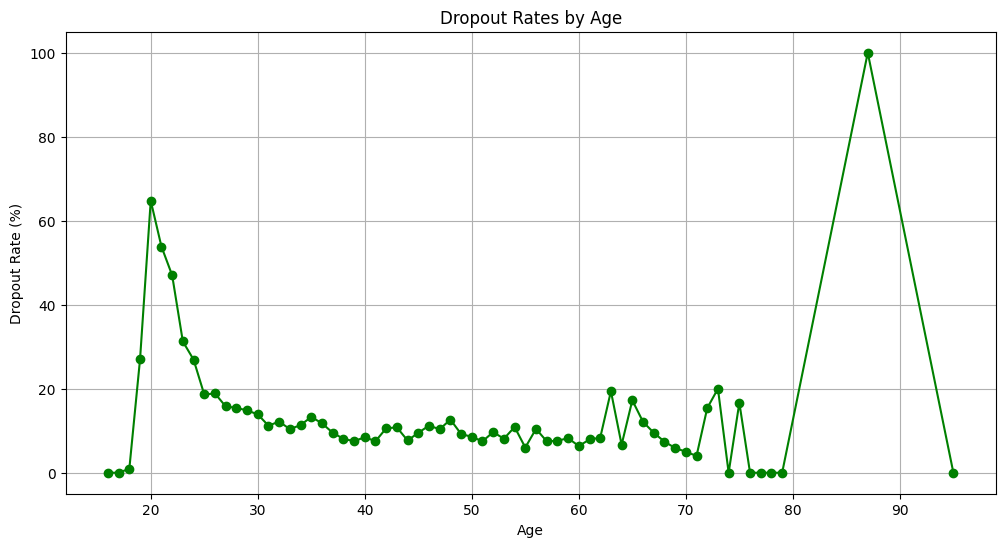

(    CensusDayCumGPA  Dropout Rate (%)
 88             1.19             100.0
 58             0.86             100.0
 29             0.51             100.0
 3              0.15             100.0
 4              0.16             100.0,
     Age  Dropout Rate (%)
 64   87        100.000000
 4    20         64.763062
 5    21         53.854626
 6    22         47.031103
 7    23         31.250000)

In [18]:
# Calculate dropout rates by GPA and Age
gpa_dropout_df = df.groupby('CensusDayCumGPA').agg({'Dropout': 'mean'}).reset_index()
gpa_dropout_df['Dropout Rate (%)'] = gpa_dropout_df['Dropout'] * 100
gpa_dropout_df.drop('Dropout', axis=1, inplace=True)

age_dropout_df = df.groupby('Age').agg({'Dropout': 'mean'}).reset_index()
age_dropout_df['Dropout Rate (%)'] = age_dropout_df['Dropout'] * 100
age_dropout_df.drop('Dropout', axis=1, inplace=True)

# Plotting dropout rates by GPA
plt.figure(figsize=(12, 6))
plt.plot(gpa_dropout_df['CensusDayCumGPA'], gpa_dropout_df['Dropout Rate (%)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Cumulative GPA')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Cumulative GPA')
plt.grid(True)
plt.show()

# Plotting dropout rates by Age
plt.figure(figsize=(12, 6))
plt.plot(age_dropout_df['Age'], age_dropout_df['Dropout Rate (%)'], marker='o', linestyle='-', color='green')
plt.xlabel('Age')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rates by Age')
plt.grid(True)
plt.show()

# Displaying the dataframes
gpa_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False).head(), age_dropout_df.sort_values(by='Dropout Rate (%)', ascending=False).head()


In [ ]:
# Perform text analytics on string columns
text_analytics_results = {}
string_columns = ('Entry_group','EntryResidentCategory', 'EntryIPEDSRaceEthnicityCategory', 'EntryGenderCode',
                  'first_generation','RetainedNoYesYearLater','RetainedNo2YearLater','entry_college',
                  'entry_major','second_year_college','second_year_major','major_abbr','FinCollegeReportingName',
                  'new_vet_desc')


for column in string_columns:
    value_counts = df[column].value_counts()
    text_analytics_results[column] = value_counts

# Convert the text analytics results into a DataFrame for easy export to Power BI
text_analytics_df = pd.DataFrame.from_dict(text_analytics_results, orient='index').transpose()

text_analytics_df


,Entry_group,EntryResidentCategory,EntryIPEDSRaceEthnicityCategory,EntryGenderCode,first_generation,RetainedNoYesYearLater,RetainedNo2YearLater,entry_college,second_year_college,FinCollegeReportingName,entry_major,second_year_major,major_abbr,new_vet_desc
Transfer Student,45832.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"First-Time, First-Year Student",18194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous or Other Student,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resident,NaN,60134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International,NaN,2056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B PHYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Not a Veteran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53466.0
Veteran or Active Military,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5314.0
Military Dependants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4792.0


In [ ]:
# Adjust the list of text columns based on available columns
text_columns = ['Entry_group', 'EntryResidentCategory', 'EntryIPEDSRaceEthnicityCategory',
                'EntryGenderCode', 'first_generation', 'entry_college', 'entry_major',
                'second_year_college', 'second_year_major', 'major_abbr',
                'FinCollegeReportingName', 'new_vet_desc']

# Combine the selected text columns into a single text column
df['combined'] = df[text_columns].astype(str).agg(' '.join, axis=1)

# # Preprocess the text data if necessary (e.g., lowercasing, removing punctuation)
df['combined_text'] = df['combined'].str.lower()

df['combined_text']
df.head()

,SDBSrcSystemKey,AcademicCareerEntryQtrKeyId,transfer_student,Entry_group,EntryResidentCategory,PELL_Eligible_at_Entry,EntryIPEDSRaceEthnicityCategory,EntryGenderCode,EntryFullTimeStudentFlag,first_generation,...,last_mm_class,major_abbr,major_pathway,FinCollegeReportingName,new_vet_desc,CensusDayCumGPA,Age,Dropout,combined,combined_text
0,1099262,20081,1,Transfer Student,Resident,1,Black or African American,F,0,Not First Generation,...,3,TIAS,0.0,Interdisciplinary Arts and Sciences,Not a Veteran,3.18,40,0,Transfer Student Resident Black or African Ame...,transfer student resident black or african ame...
1,1099263,20144,1,Transfer Student,Resident,1,White,M,0,First to BA Degree,...,4,TCES,0.0,School of Engineering and Technology,Not a Veteran,3.47,34,0,Transfer Student Resident White M First to BA ...,transfer student resident white m first to ba ...
2,1099264,20074,1,Transfer Student,Resident,1,Asian,F,1,First to College,...,4,T ACCT,0.0,Milgard School of Business,Not a Veteran,3.33,60,0,Transfer Student Resident Asian F First to Col...,transfer student resident asian f first to col...
3,1099266,20084,1,Transfer Student,Resident,0,White,F,1,Not First Generation,...,4,TAMC,0.0,Interdisciplinary Arts and Sciences,Not a Veteran,3.33,39,0,Transfer Student Resident White F Not First Ge...,transfer student resident white f not first ge...
4,1099273,20074,1,Transfer Student,Resident,1,Black or African American,M,0,First to BA Degree,...,4,TGS,0.0,Interdisciplinary Arts and Sciences,Not a Veteran,3.13,62,0,Transfer Student Resident Black or African Ame...,transfer student resident black or african ame...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the combined text data to get TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

# Print the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(64118, 269)


#**Machine Learning**


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [20]:

# Preprocess your data
# df.drop(['Graduated', 'Lost_at_Term'], axis=1, inplace=True)
X = df.drop('Dropout', axis=1)
y = df['Dropout']

# Encode categorical variables
X = pd.get_dummies(X)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**5 ML models**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Display results
for name, metrics in results.items():
    print(f"{name}:\nAccuracy: {metrics['Accuracy']}\nConfusion Matrix:\n{metrics['Confusion Matrix']}\nPrecision: {metrics['Precision']}\nRecall: {metrics['Recall']}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9980245373258474
Confusion Matrix:
[[15824     0]
 [   38  3374]]
Precision: 1.0
Recall: 0.988862837045721

Decision Tree:
Accuracy: 1.0
Confusion Matrix:
[[15824     0]
 [    0  3412]]
Precision: 1.0
Recall: 1.0

Random Forest:
Accuracy: 1.0
Confusion Matrix:
[[15824     0]
 [    0  3412]]
Precision: 1.0
Recall: 1.0

Gradient Boosting:
Accuracy: 1.0
Confusion Matrix:
[[15824     0]
 [    0  3412]]
Precision: 1.0
Recall: 1.0

SVM:
Accuracy: 0.9830006238303182
Confusion Matrix:
[[15815     9]
 [  318  3094]]
Precision: 0.9970995810505962
Recall: 0.906799531066823



**Identify Top 10 Features Using Feature Importance**

In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Fit Logistic Regression to get coefficients
lr = LogisticRegression()
lr.fit(X_train, y_train)
coefficients = lr.coef_[0]

# Get indices of top 20 features based on absolute values of coefficients
top_20_indices = np.argsort(np.abs(coefficients))[-20:]

# Extract the top 20 features
X_train_top20 = X_train[:, top_20_indices]
X_test_top20 = X_test[:, top_20_indices]

# Print the top 20 feature indices and their coefficient values
top_20_features = [(index, coefficients[index]) for index in top_20_indices]
print("Top 20 features and their coefficients:")
for feature in top_20_features:
    print(f"Feature Index: {feature[0]}, Coefficient: {feature[1]}")


Top 20 features and their coefficients:
Feature Index: 22, Coefficient: -0.35770685917328987
Feature Index: 506, Coefficient: 0.36126617779662473
Feature Index: 20, Coefficient: -0.3692869107325355
Feature Index: 134, Coefficient: -0.3769693638609259
Feature Index: 93, Coefficient: 0.3841904416160105
Feature Index: 327, Coefficient: 0.38989410147691567
Feature Index: 282, Coefficient: 0.4271665188172015
Feature Index: 25, Coefficient: 0.528307726017407
Feature Index: 6, Coefficient: -0.6104674016407693
Feature Index: 302, Coefficient: -0.6289093791013187
Feature Index: 1, Coefficient: 0.7543029376648722
Feature Index: 26, Coefficient: 0.811916653168568
Feature Index: 7, Coefficient: 1.126833804057049
Feature Index: 10, Coefficient: 2.183386675442473
Feature Index: 12, Coefficient: -2.976413788675597
Feature Index: 11, Coefficient: -3.502465451248797
Feature Index: 8, Coefficient: -3.598153333443534
Feature Index: 9, Coefficient: -3.7863054492747965
Feature Index: 19, Coefficient: -13.7

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import numpy as np

# Fit Random Forest to get feature importances
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

# Get indices of top 10 features
top_10_indices = np.argsort(feature_importances)[-10:]

# Extract the top 10 features
X_train_top10 = X_train[:, top_10_indices]
X_test_top10 = X_test[:, top_10_indices]


In [ ]:
# Retrain and evaluate each model using top 10 features
results_top10 = {}

for name, model in models.items():
    model.fit(X_train_top10, y_train)
    y_pred = model.predict(X_test_top10)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    results_top10[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall
    }

# Display results
for name, metrics in results_top10.items():
    print(f"{name} with Top 10 Features:\nAccuracy: {metrics['Accuracy']}\nConfusion Matrix:\n{metrics['Confusion Matrix']}\nPrecision: {metrics['Precision']}\nRecall: {metrics['Recall']}\n")


Logistic Regression with Top 10 Features:
Accuracy: 0.9798294863797047
Confusion Matrix:
[[15797    27]
 [  361  3051]]
Precision: 0.9912280701754386
Recall: 0.8941969519343493

Decision Tree with Top 10 Features:
Accuracy: 0.9891349552921606
Confusion Matrix:
[[15756    68]
 [  141  3271]]
Precision: 0.9796346211440551
Recall: 0.9586752637749121

Random Forest with Top 10 Features:
Accuracy: 0.9892389270118528
Confusion Matrix:
[[15758    66]
 [  141  3271]]
Precision: 0.9802217560683248
Recall: 0.9586752637749121

Gradient Boosting with Top 10 Features:
Accuracy: 0.9822208359326263
Confusion Matrix:
[[15771    53]
 [  289  3123]]
Precision: 0.9833123425692695
Recall: 0.9152989449003517

SVM with Top 10 Features:
Accuracy: 0.9802453732584737
Confusion Matrix:
[[15805    19]
 [  361  3051]]
Precision: 0.9938110749185668
Recall: 0.8941969519343493



In [ ]:
# Import necessary library
import numpy as np

# Fit Random Forest to get feature importances
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
target_column = 'Dropout'

# Get indices of top 10 features
top_10_indices = np.argsort(feature_importances)[-10:]

# Extract the feature names
feature_names = df.drop(columns=[target_column]).columns
top_10_feature_names = feature_names[top_10_indices]
top_10_importances = feature_importances[top_10_indices]

# Display the top 10 features
# Display the top 10 features with their weights
print("Top 10 features and their importance weights:")
for feature, importance in zip(top_10_feature_names, top_10_importances):
    print(f"{feature}: {importance}")


Top 10 features and their importance weights:
PELL_Eligible_at_Entry: 0.039348643709888234
DegreeGrantedUWEarnedCredits: 0.04406803107124665
TimeToDegreeInYears: 0.049240662398321346
GraduatedByYear05: 0.04972473441458745
GraduatedByYear04: 0.0567186998876452
EntryGenderCode: 0.058677713752144416
EntryFullTimeStudentFlag: 0.06103350789357849
EntryIPEDSRaceEthnicityCategory: 0.062463930871489964
LastCareerLevelEnrolledAcademicQtrKeyId: 0.06340942785814271
first_generation: 0.08221754856549134


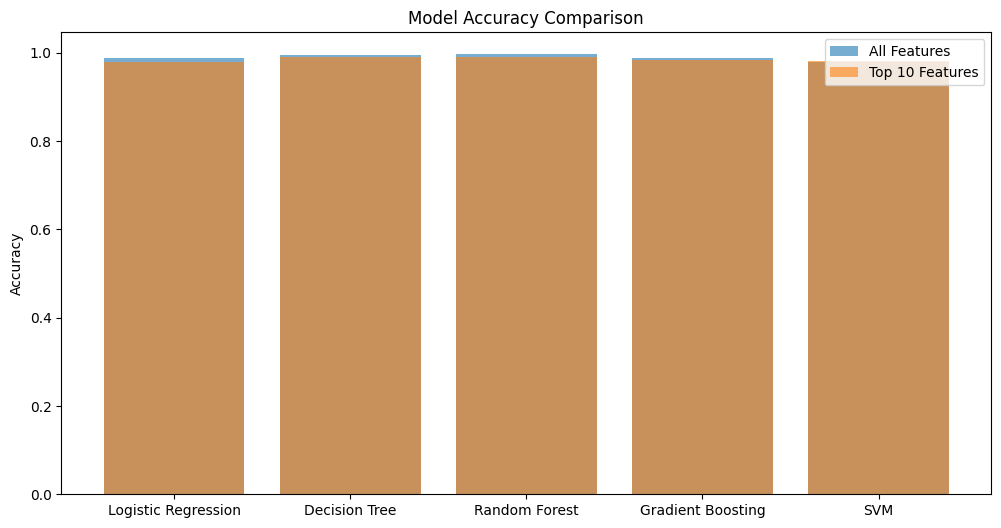

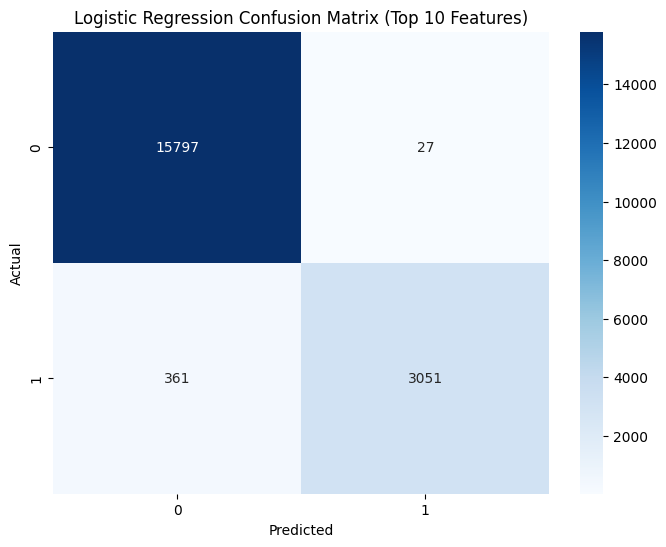

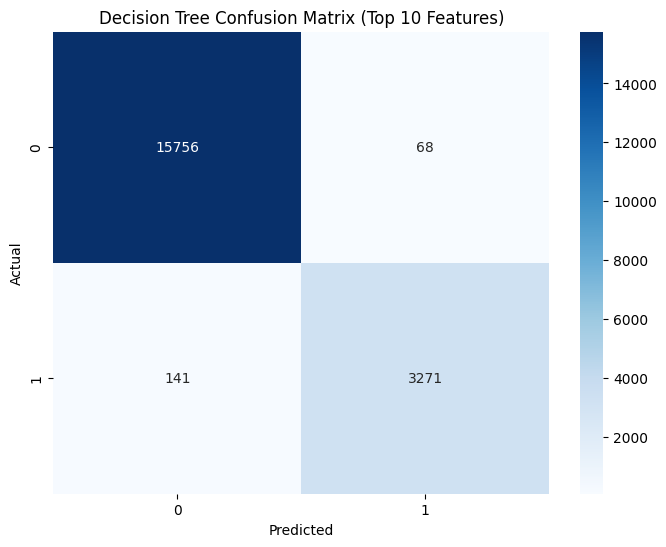

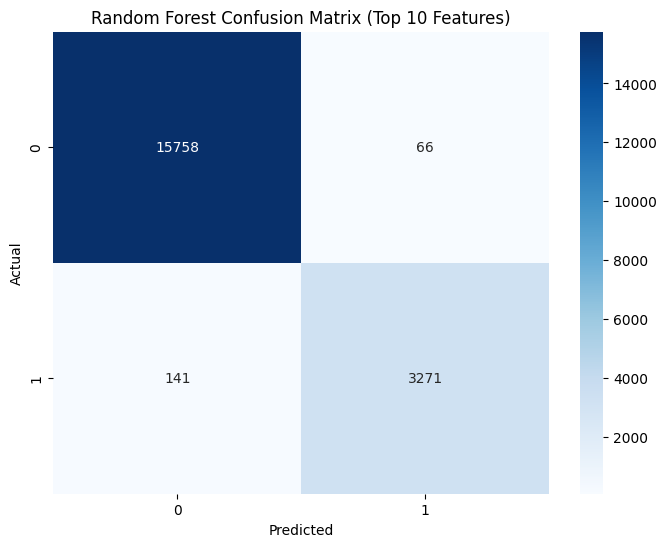

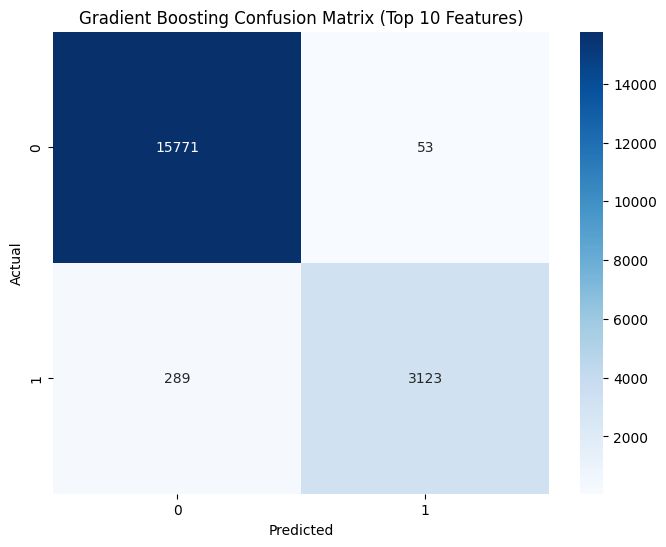

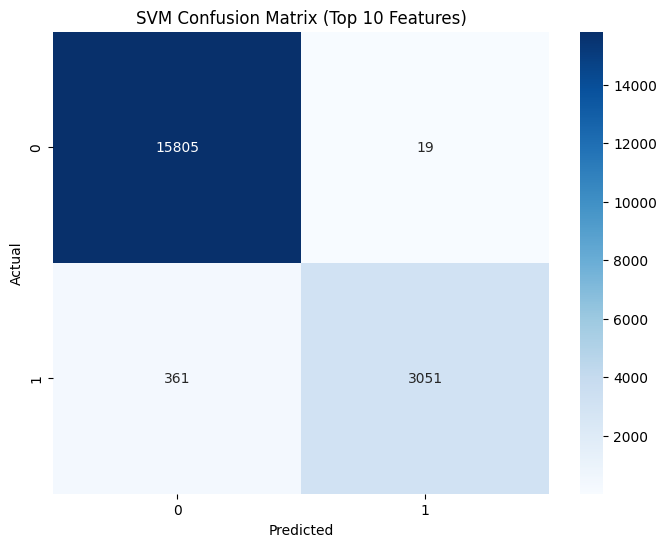

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy comparison
model_names = list(results.keys())
accuracy_all_features = [metrics['Accuracy'] for metrics in results.values()]
accuracy_top10_features = [metrics['Accuracy'] for metrics in results_top10.values()]

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracy_all_features, alpha=0.6, label='All Features')
plt.bar(model_names, accuracy_top10_features, alpha=0.6, label='Top 10 Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model with top 10 features
for name, metrics in results_top10.items():
    plot_confusion_matrix(metrics['Confusion Matrix'], f"{name} Confusion Matrix (Top 10 Features)")


**Address Overfitting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with limited depth
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_top10, y_train)
y_pred_dt = dt.predict(X_test_top10)

# Evaluate
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree with max_depth=5 Accuracy: {accuracy_dt}")


Decision Tree with max_depth=5 Accuracy: 0.9816489914743189


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L2 regularization
log_reg = LogisticRegression(penalty='l2', C=0.1, random_state=42)
log_reg.fit(X_train_top10, y_train)
y_pred_log_reg = log_reg.predict(X_test_top10)

# Evaluate
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression with L2 regularization Accuracy: {accuracy_log_reg}")


Logistic Regression with L2 regularization Accuracy: 0.9800374298190893


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(RandomForestClassifier(random_state=42), X_train_top10, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores for Random Forest:", cv_scores_rf)
print("Mean cross-validation score for Random Forest:", np.mean(cv_scores_rf))


Cross-validation scores for Random Forest: [0.98919461 0.99041996 0.98863636 0.98819073 0.9891934 ]
Mean cross-validation score for Random Forest: 0.9891270139355933


# **Ensemble Method**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC(probability=True)

# Combine models into a Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_top10, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_top10)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='binary')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='binary')

print(f"Ensemble Model:\nAccuracy: {accuracy_ensemble}\nConfusion Matrix:\n{cm_ensemble}\nPrecision: {precision_ensemble}\nRecall: {recall_ensemble}\n")


Ensemble Model:
Accuracy: 0.9845082137658557
Confusion Matrix:
[[15795    29]
 [  269  3143]]
Precision: 0.9908575031525851
Recall: 0.9211606096131302



 **Learning Curves**
Plotting learning curves to diagnose overfitting or underfitting.

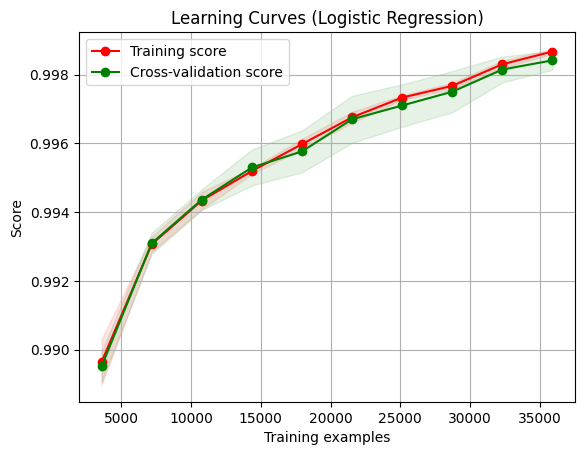

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data for Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=10000, random_state=42), X_train_top20, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


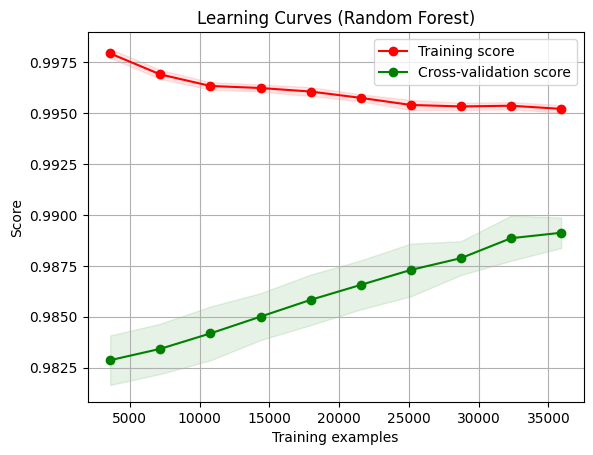

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(random_state=42), X_train_top10, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


# **Random Forest**

Cross-validation accuracy: 0.9954770107684583
Top 20 features and their importance:
degree_UWT: 0.08078941123762312
Graduated_yrqtr: 0.07764684218699953
DegreeGrantedTotalCredits: 0.061915518090818404
TimeToDegreeInYears: 0.06025276443186014
DegreeGrantedUWEarnedCredits: 0.06017744279616194
Re_enrolled_next_academic_year: 0.056885472364581774
second_year_ncr_code: 0.04732516695443596
last_mm_tot_credits: 0.0442520585083993
second_year_class_code: 0.040370821819353954
AcademicCareerEntryQtrKeyId: 0.03492856827490584
LastCareerLevelEnrolledAcademicQtrKeyId: 0.03396190055065592
RetainedNoYesYearLater_Yes: 0.03039731137223239
GraduatedByYear06: 0.02887135697766533
last_mm_class: 0.025419006479172127
CensusDayCumGPA: 0.025312757410110093
GraduatedByYear05: 0.02499900429878702
RetainedNoYesYearLater_No: 0.022392395686045986
second_year_major_Unknown: 0.02146651070284468
second_year_tot_credits: 0.020358494721389127
GraduatedByYear03: 0.018848908957643618


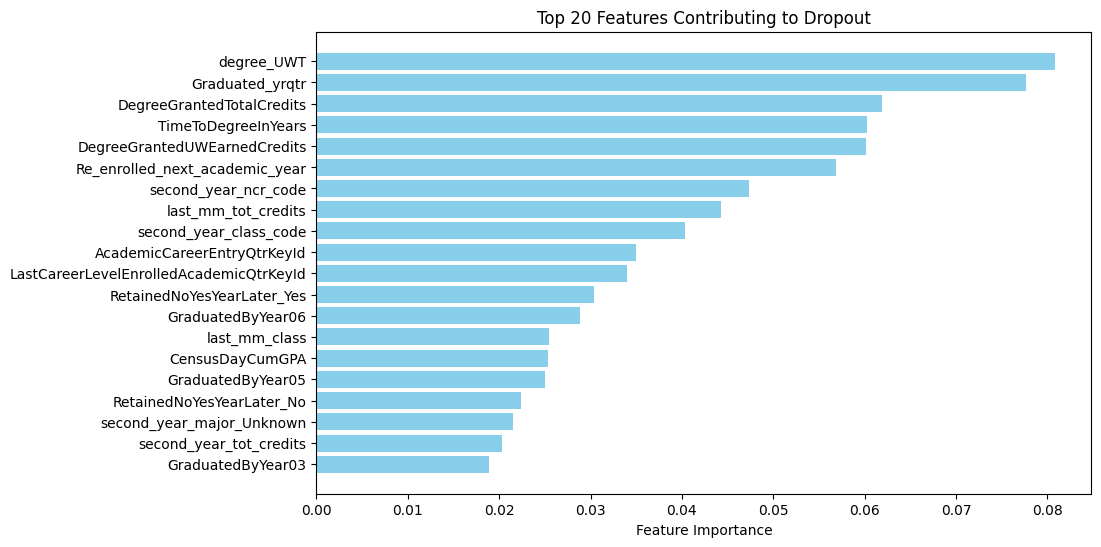

In [ ]:
# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model with cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean()}')

# Extract feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = np.array(pd.get_dummies(df.drop('Dropout', axis=1)).columns)

# Get the top 20 features
top_indices = np.argsort(feature_importances)[-20:][::-1]
top_features = feature_names[top_indices]
top_importances = feature_importances[top_indices]

# Print the top 12 features and their importance
print("Top 20 features and their importance:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Features Contributing to Dropout')
plt.gca().invert_yaxis()
plt.show()

Cross-validation accuracy: 0.9647685053404069
Top 20 features and their coefficients:
last_mm_tot_credits: 0.11296582023742549
DegreeGrantedTotalCredits: -0.0986834889179101
second_year_tot_credits: -0.09051980351589456
entry_tot_credits: -0.07695291278067709
DegreeGrantedUWEarnedCredits: -0.05534086732149905
AcademicCareerEntryQtrKeyId: -0.03441799823479503
LastCareerLevelEnrolledAcademicQtrKeyId: 0.03205129577254042
Lost_at_Term: 0.028138766301939636
second_year_ncr_code: -0.016305900394172547
Age: -0.010384763039177585
second_year_class_code: 0.008292042514325783
Re_enrolled_next_academic_year: 0.0035722657850505283
GraduatedByYear01: -0.0033598580671406666
second_year_major_Unknown: -0.0032991173394059854
Graduated_yrqtr: 0.002531043665770629
RetainedNoYesYearLater_No: -0.0021851834604187316
RetainedNoYesYearLater_Yes: 0.0021814220776923492
major_pathway: 0.002079354977477567
last_mm_class: 0.0017585102436196622
entry_class_code: -0.001597548815750578


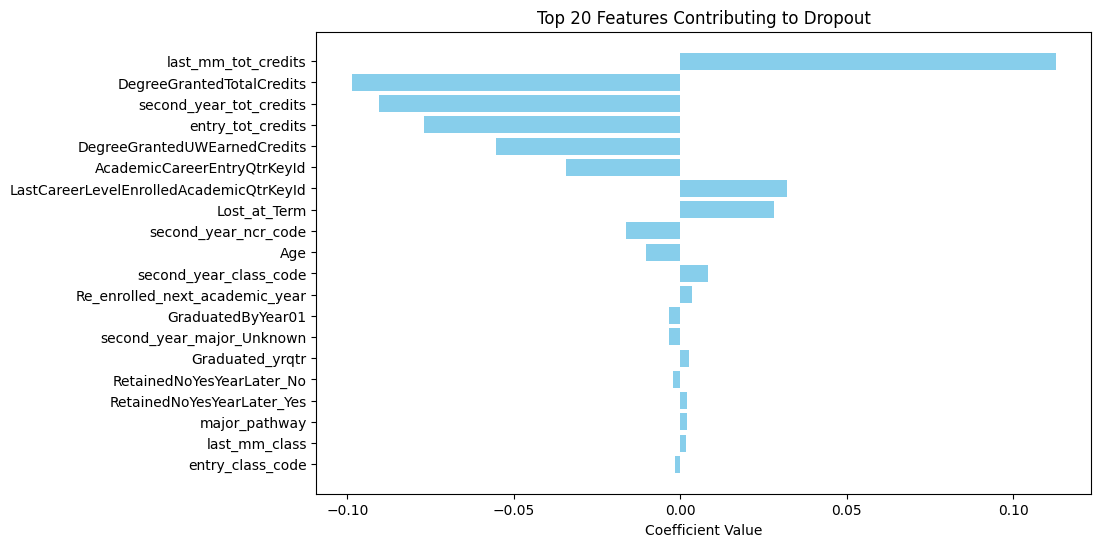

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Assume df is your DataFrame and 'Dropout' is the target column

# Prepare the data
X = pd.get_dummies(df.drop('Dropout', axis=1))
y = df['Dropout']

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X, y)

# Evaluate the model with cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation accuracy: {cv_scores.mean()}')

# Extract coefficients
coefficients = model.coef_[0]

# Get feature names
feature_names = np.array(X.columns)

# Get the top 20 features
top_indices = np.argsort(np.abs(coefficients))[-20:][::-1]
top_features = feature_names[top_indices]
top_coefficients = coefficients[top_indices]

# Print the top 20 features and their coefficients
print("Top 20 features and their coefficients:")
for feature, coefficient in zip(top_features, top_coefficients):
    print(f"{feature}: {coefficient}")

# Optional: Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Features Contributing to Dropout')
plt.gca().invert_yaxis()
plt.show()


In [25]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy}')


Test accuracy: 0.8389997920565606


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f'Training accuracy: {train_accuracy}')

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test accuracy: {test_accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
class_report = classification_report(y_test, y_pred_test)
print(f'Classification Report:\n{class_report}')

Training accuracy: 0.9906421282474043
Test accuracy: 0.9889789977126222
Confusion Matrix:
[[15787    37]
 [  175  3237]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15824
           1       0.99      0.95      0.97      3412

    accuracy                           0.99     19236
   macro avg       0.99      0.97      0.98     19236
weighted avg       0.99      0.99      0.99     19236



In [ ]:
from sklearn.linear_model import LogisticRegression

# Apply L2 regularization
model = LogisticRegression(penalty='l2', C=1.0)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model on the training set
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.9905307250122544
Test Accuracy: 0.9888230401330838


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[15785    39]
 [  176  3236]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15824
           1       0.99      0.95      0.97      3412

    accuracy                           0.99     19236
   macro avg       0.99      0.97      0.98     19236
weighted avg       0.99      0.99      0.99     19236



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.99033063 0.9922801  0.98705552 0.99025189 0.98853622]
Mean cross-validation score: 0.9896908731770916


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SVM using Ensemble method**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assume df is your DataFrame and 'Dropout' is your target column
X = df.drop('Dropout', axis=1)
y = df['Dropout']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Define the column transformer with OneHotEncoder for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Define the base estimator (SVM) and the bagging classifier
base_estimator = SVC(probability=True, random_state=42)
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

# Create a pipeline that first transforms the data and then applies the bagging model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', bagging_model)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Compute accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification report
class_report = classification_report(y_test, y_pred_test)
print(f'Classification Report:\n{class_report}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training accuracy: 0.8253642885789403
Test accuracy: 0.8226242462050323
Confusion Matrix:
[[15824     0]
 [ 3412     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     15824
           1       0.00      0.00      0.00      3412

    accuracy                           0.82     19236
   macro avg       0.41      0.50      0.45     19236
weighted avg       0.68      0.82      0.74     19236



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#** Deployment**

In [ ]:
!pip install Flask flask-ngrok joblib


In [ ]:
# Step 2: Import libraries and define your model training code
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import joblib

In [ ]:
from flask import Flask, request, jsonify

app = Flask(_name_)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Your processing code here
    result = your_function(data)
    return jsonify(result)

if _name_ == '_main_':
    app.run(host='0.0.0.0', port=80)

In [ ]:
# Save the trained ensemble model to a file
joblib.dump(ensemble_model, 'ensemble_model.pkl')

# Step 3: Set up Flask application
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Load the trained model
model = joblib.load('ensemble_model.pkl')

@app.route('/')
def home():
    return "Welcome to the Dropout Prediction API!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    probability = model.predict_proba(features)

    response = {
        'prediction': int(prediction[0]),
        'probability': probability.tolist()
    }

    return jsonify(response)

# Step 4: Run the Flask application
app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll